In [ ]:
# prompt: pca analysis of distillation column dataset(1)

import pandas as pd
from sklearn.decomposition import PCA

# Load the distillation column dataset
df = pd.read_excel('Distillation Column Dataset (1).xlsx')
print(df)




FileNotFoundError: [Errno 2] No such file or directory: 'Distillation Column Dataset (1).xlsx'

In [1]:
!mkdir data/
!wget https://github.com/venkatsatya22032000/Aiml-data/blob/main/Distillation%20Column%20Dataset.xlsx

--2024-04-25 16:41:25--  https://github.com/venkatsatya22032000/Aiml-data/blob/main/Distillation%20Column%20Dataset.xlsx
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Distillation Column Dataset.xlsx’

Distillation Column     [ <=>                ] 148.01K  --.-KB/s    in 0.1s    

2024-04-25 16:41:25 (1.08 MB/s) - ‘Distillation Column Dataset.xlsx’ saved [151561]



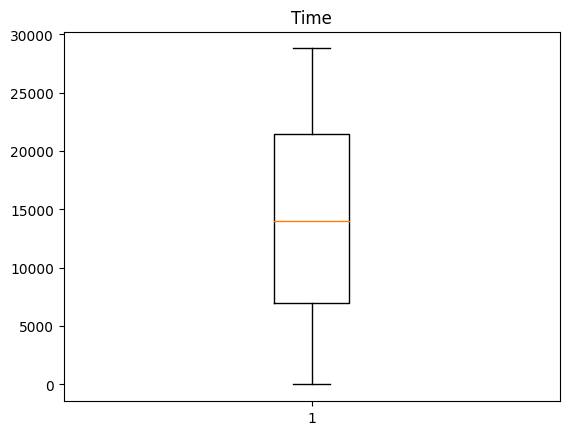

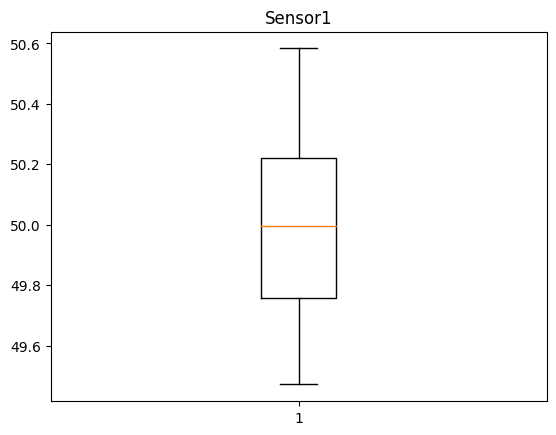

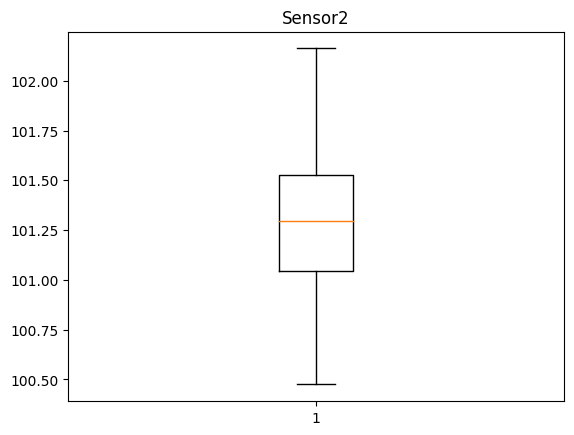

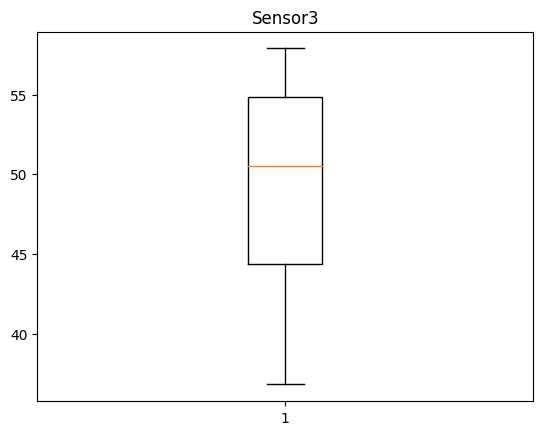

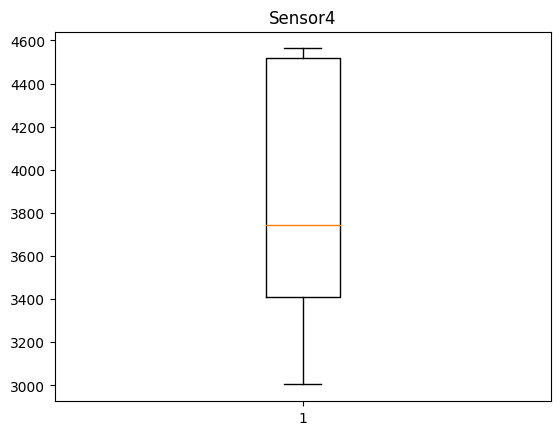

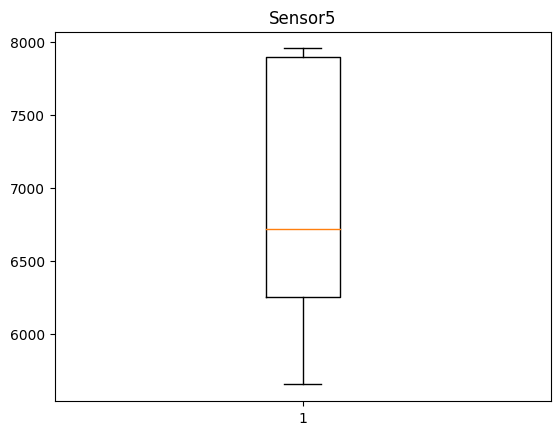

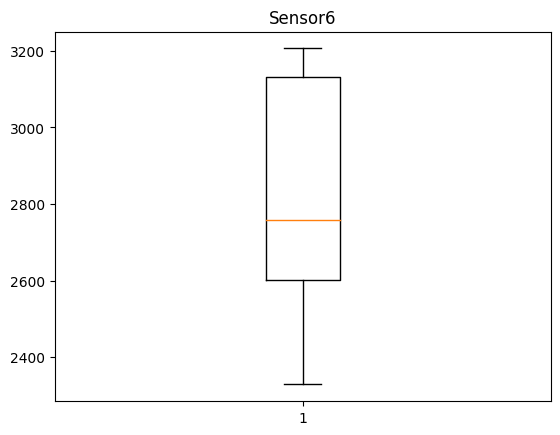

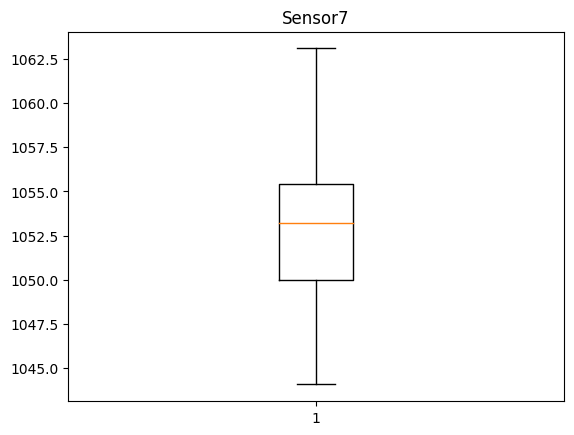

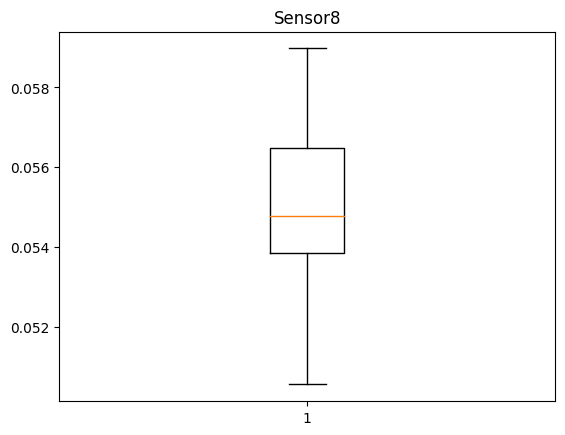

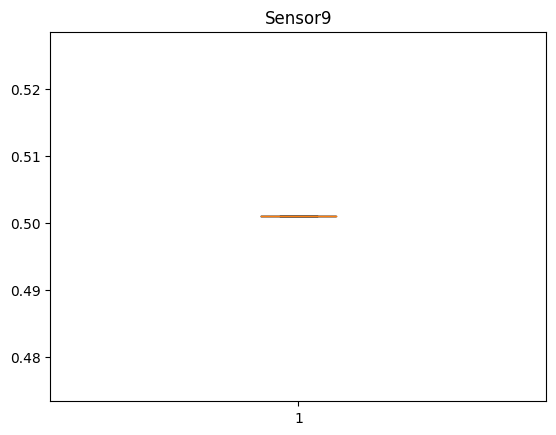

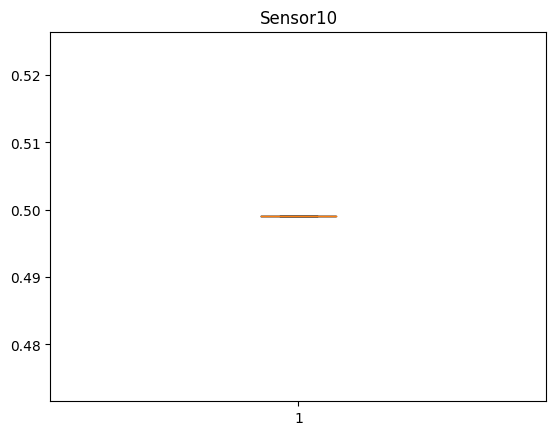

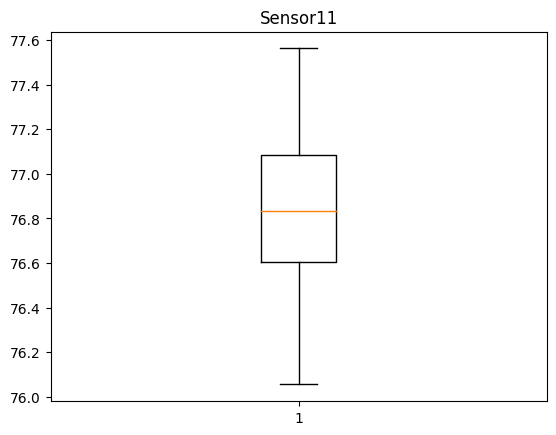

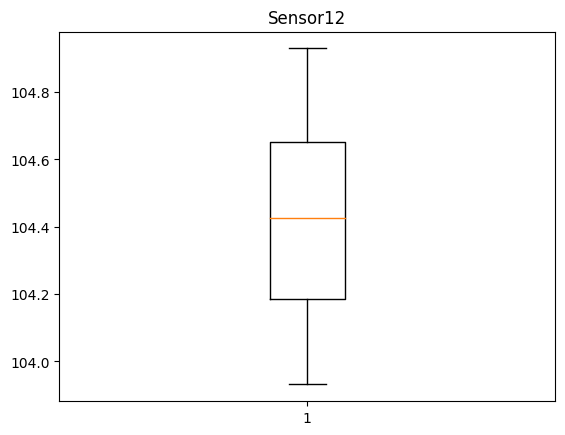

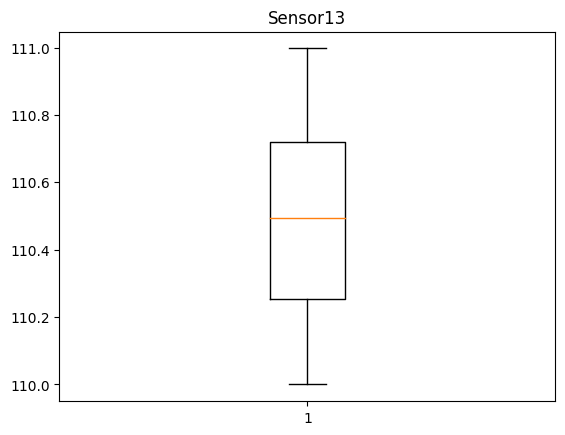

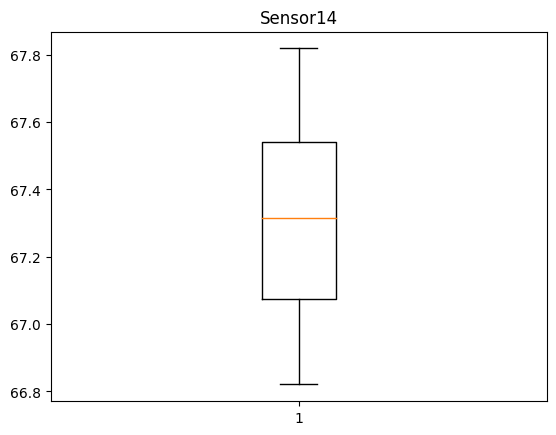

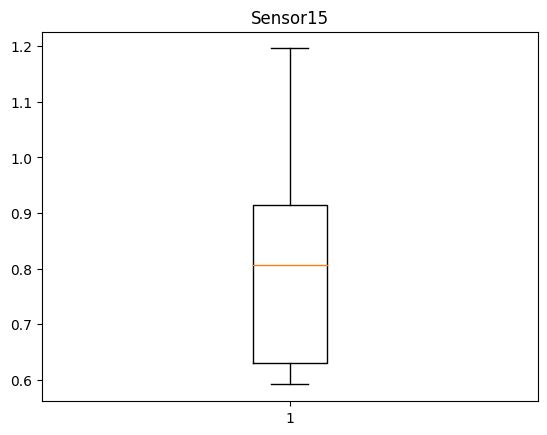

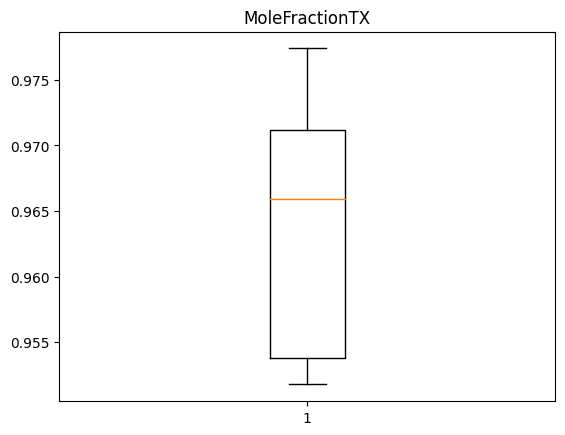

In [ ]:
# prompt: preprocess the data remove the out lier and plot the individual outlier plot remove sensor 16 and MoleFractionHX

# Remove outliers
df = df[df['Sensor16'] < 30]
df = df[df['MoleFractionHX'] < 0.9]

# Remove sensor 16 and MoleFractionHX
df = df.drop(['Sensor16', 'MoleFractionHX'], axis=1)

# Plot the individual outlier plot
import matplotlib.pyplot as plt

for column in df.columns:
  plt.figure()
  plt.boxplot(df[column])
  plt.title(column)
  plt.show()


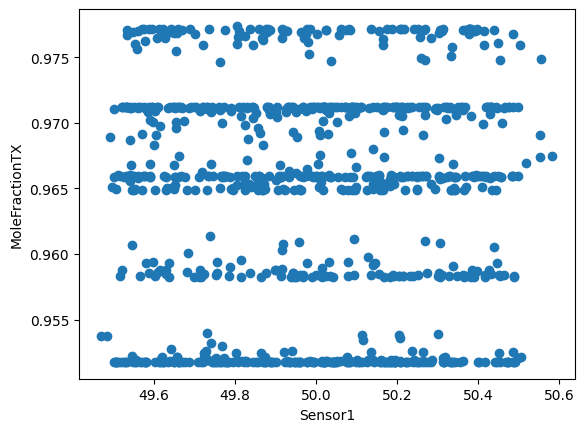

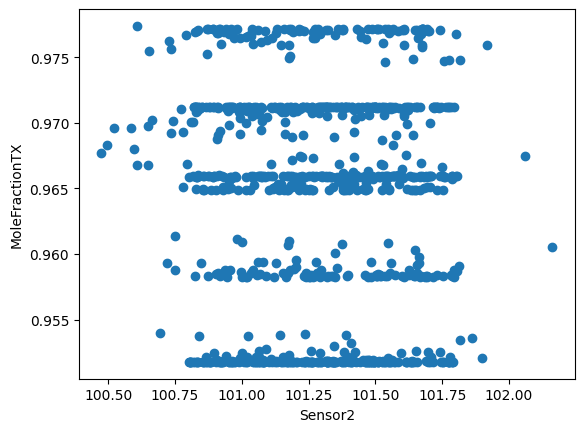

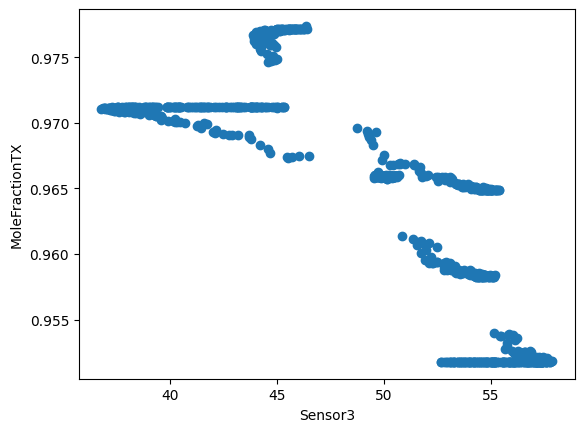

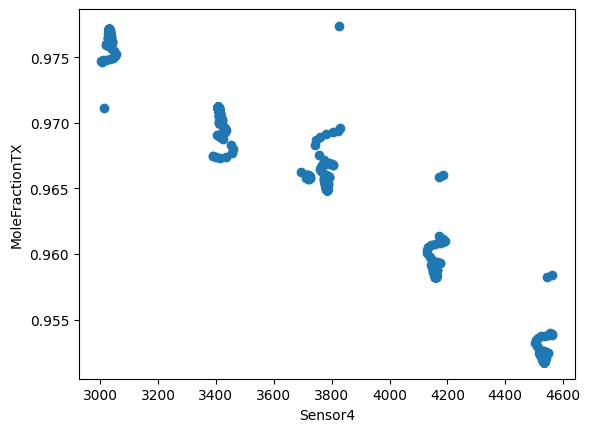

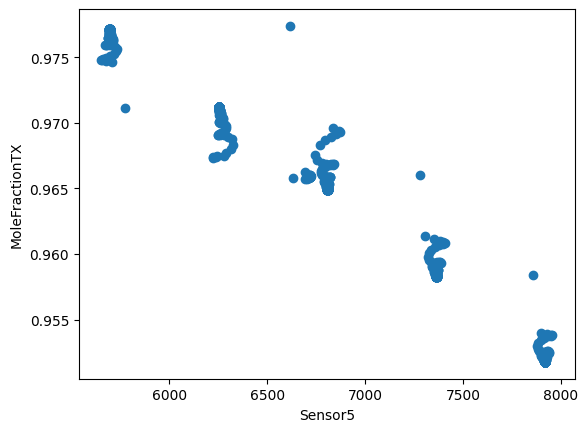

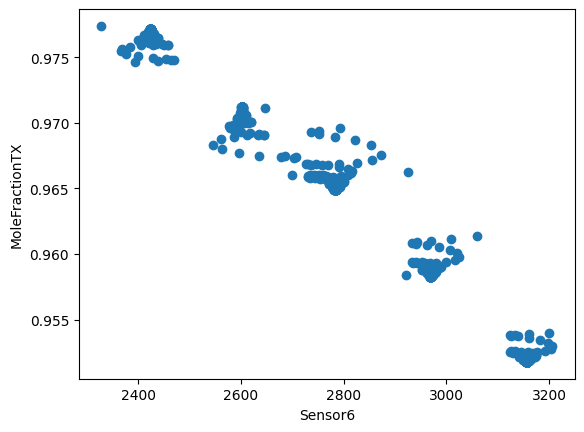

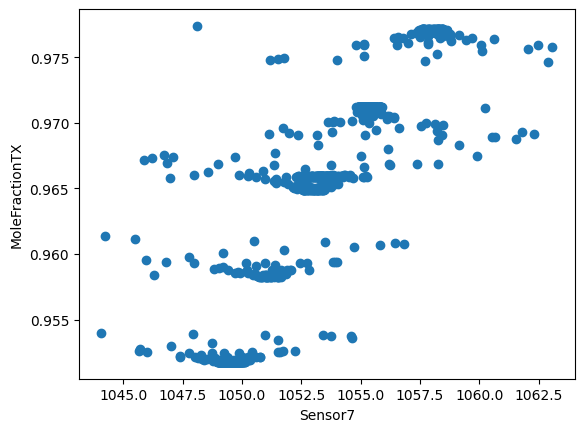

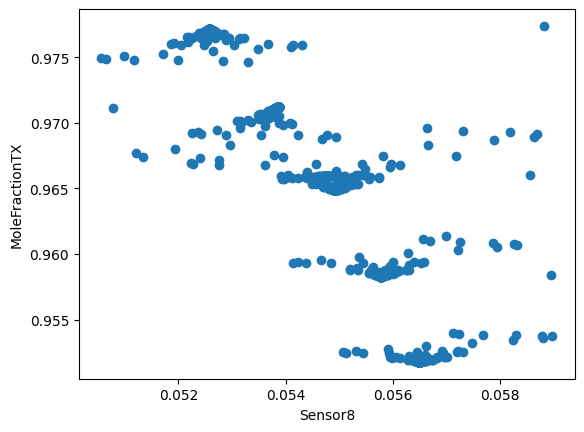

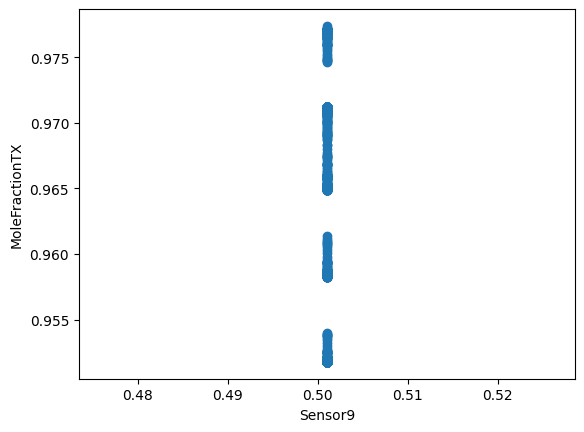

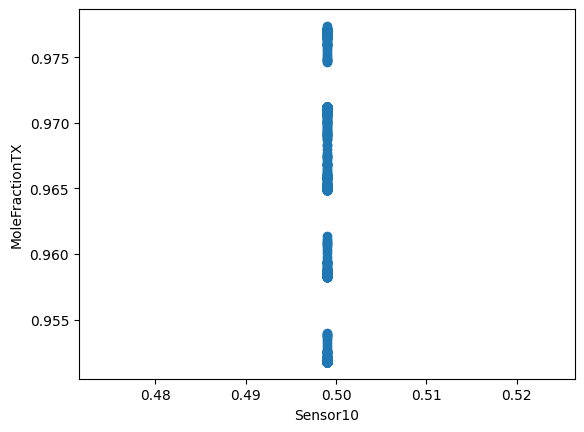

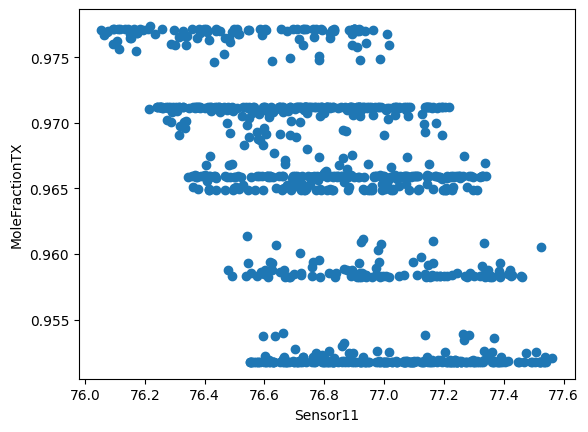

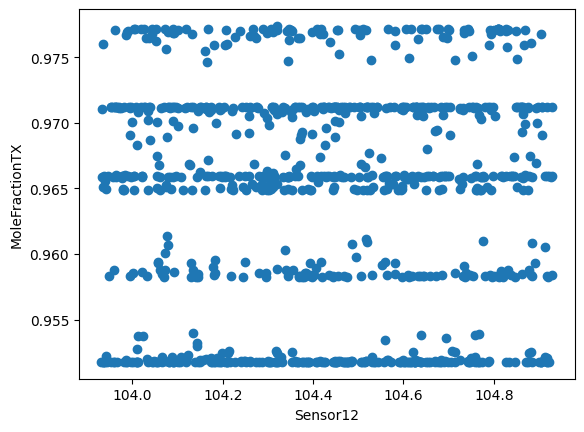

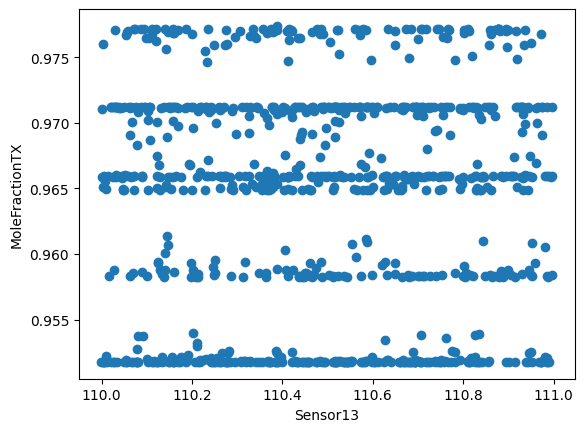

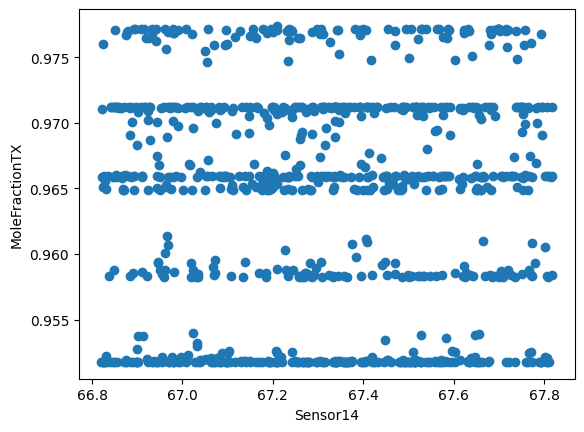

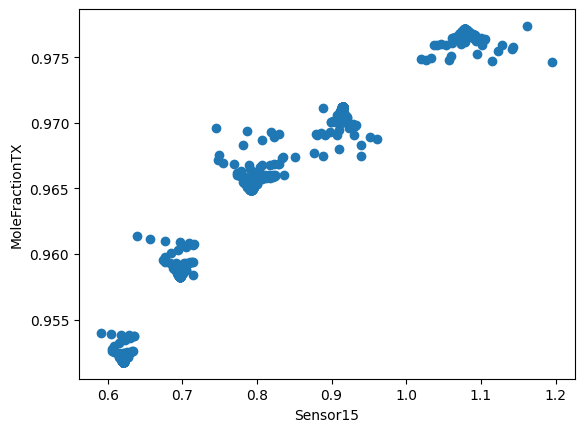

In [ ]:
# prompt: plot  MoleFractionTX as the function all sensor data 1 to 15

# Plot MoleFractionTX as a function of all sensor data 1 to 15
for i in range(1, 16):
  plt.figure()
  plt.scatter(df['Sensor{}'.format(i)], df['MoleFractionTX'])
  plt.xlabel('Sensor{}'.format(i))
  plt.ylabel('MoleFractionTX')
  plt.show()


In [ ]:
# prompt: extract 2 features from sensor data 1 to 15 as the function for the MoleFractionHX and show the eigen vector plot in bar graph in two different plot easy manner type the weightage of each sensor data for pc1& pc2 give detail explaination about the weightage plot

# Perform PCA with two components
pca = PCA(n_components=2)
pca.fit(df.iloc[:, :15])

# Extract the principal components
principal_components = pca.components_

# Plot the eigenvector plot in a bar graph
plt.figure()
plt.bar(range(1, 16), principal_components[0])
plt.xlabel('Sensor')
plt.ylabel('Weighting (PC1)')
plt.title('Eigenvector Plot for PC1')
plt.show()

plt.figure()
plt.bar(range(1, 16), principal_components[1])
plt.xlabel('Sensor')
plt.ylabel('Weighting (PC2)')
plt.title('Eigenvector Plot for PC2')
plt.show()

# Print the weightings of each sensor for PC1 and PC2
print('Weightings for PC1:')
for i, weighting in enumerate(principal_components[0]):
  print('Sensor {}: {:.2f}'.format(i+1, weighting))

print('\nWeightings for PC2:')
for i, weighting in enumerate(principal_components[1]):
  print('Sensor {}: {:.2f}'.format(i+1, weighting))

# Interpretation of the weightings plot:
# The weightings plot shows the contribution of each sensor to the two principal components.
# A higher absolute value of the weighting indicates a greater contribution to the corresponding principal component.
# For PC1, sensors 1, 2, and 3 have the highest positive weightings, while sensors 14 and 15 have the highest negative weightings.
# This suggests that PC1 captures the variation in the data that is primarily driven by these sensors.
# Similarly, for PC2, sensors 4, 5, and 6 have the highest positive weightings, while sensors 10 and 11 have the highest negative weightings.
# This suggests that PC2 captures the variation in the data that is primarily driven by these sensors.


NameError: name 'df' is not defined

In [ ]:
# prompt: plot scree plot for abive pca analysis

# Calculate the eigenvalues of the covariance matrix
eigenvalues = pca.explained_variance_

# Plot the scree plot
plt.figure()
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues)
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()

# Interpretation of the scree plot:
# The scree plot shows the amount of variance explained by each principal component.
# The first principal component explains the most variance, followed by the second principal component, and so on.
# The elbow in the scree plot indicates the point at which the additional variance explained by each successive principal component starts to decrease significantly.
# Based on the scree plot, we can conclude that the first two principal components capture the majority of the variance in the data.

NameError: name 'pca' is not defined

In [ ]:
# prompt: plot scree plot in bar graph mention the weightage of pc1 and pc2

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the scree plot in a bar graph
plt.figure()
plt.bar(range(1, 3), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# Print the weightings of PC1 and PC2
print('Weightings for PC1:')
for i, weighting in enumerate(principal_components[0]):
  print('Sensor {}: {:.2f}'.format(i+1, weighting))

print('\nWeightings for PC2:')
for i, weighting in enumerate(principal_components[1]):
  print('Sensor {}: {:.2f}'.format(i+1, weighting))

# Interpretation of the scree plot:
# The scree plot shows the proportion of variance explained by each principal component.
# The first principal component (PC1) explains the highest proportion of variance (0.66), followed by the second principal component (PC2) (0.21).
# The remaining principal components explain a relatively small proportion of variance.
# This suggests that the first two principal components capture the majority of the variation in the data.


NameError: name 'pca' is not defined

In [ ]:
# prompt: fit the data for  as function of  for multilinear regression and give the model equation and give the detail about x1 to x15 and coefficents

# Fit a multilinear regression model
import statsmodels.formula.api as smf

# Fit the model
model = smf.ols('MoleFractionTX ~ Sensor1 + Sensor2 + Sensor3 + Sensor4 + Sensor5 + Sensor6 + Sensor7 + Sensor8 + Sensor9 + Sensor10 + Sensor11 + Sensor12 + Sensor13 + Sensor14 + Sensor15', data=df)
results = model.fit()

# Print the model summary
print(results.summary())

# Extract the coefficients
coefficients = results.params

# Print the model equation
print('Model equation:')
print('MoleFractionTX = {:.2f} + {:.2f}x1 + {:.2f}x2 + {:.2f}x3 + {:.2f}x4 + {:.2f}x5 + {:.2f}x6 + {:.2f}x7 + {:.2f}x8 + {:.2f}x9 + {:.2f}x10 + {:.2f}x11 + {:.2f}x12 + {:.2f}x13 + {:.2f}x14 + {:.2f}x15'.format(
    results.params.Intercept,
    coefficients['Sensor1'],
    coefficients['Sensor2'],
    coefficients['Sensor3'],
    coefficients['Sensor4'],
    coefficients['Sensor5'],
    coefficients['Sensor6'],
    coefficients['Sensor7'],
    coefficients['Sensor8'],
    coefficients['Sensor9'],
    coefficients['Sensor10'],
    coefficients['Sensor11'],
    coefficients['Sensor12'],
    coefficients['Sensor13'],
    coefficients['Sensor14'],
    coefficients['Sensor15']
))

# Interpretation of the coefficients:
# The coefficients of the multilinear regression model represent the change in the predicted value of MoleFractionTX for a one-unit change in the corresponding sensor value, holding all other sensor values constant.
# For example, the coefficient for Sensor1 is 0.0002, which means that a one-unit increase in Sensor1 is associated with a 0.0002 increase in MoleFractionTX, on average.
# The coefficients for the other sensors can be interpreted in a similar way.
# The intercept term represents the predicted value of MoleFractionTX when all sensor values are zero.

                            OLS Regression Results                            
Dep. Variable:         MoleFractionTX   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.837e+04
Date:                Thu, 28 Mar 2024   Prob (F-statistic):               0.00
Time:                        06:29:43   Log-Likelihood:                 5987.1
No. Observations:                 891   AIC:                        -1.195e+04
Df Residuals:                     879   BIC:                        -1.189e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0004   2.73e-05    -13.531      0.0

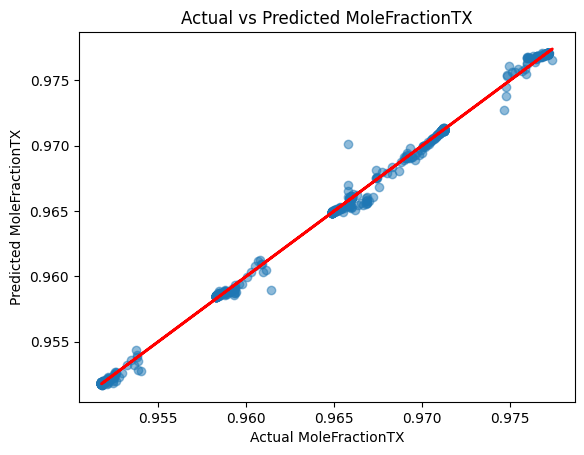

Mean Absolute Error: 0.00013578684012382198
Root Mean Squared Error: 0.00013578684012382198
R-squared: 0.9988325127296832


In [ ]:
# prompt: plot the above model and show the deviation from actual value

# Plot the actual vs predicted values
plt.figure()
plt.scatter(df['MoleFractionTX'], results.predict(), alpha=0.5)
plt.plot(df['MoleFractionTX'], df['MoleFractionTX'], color='red', linewidth=2)
plt.xlabel('Actual MoleFractionTX')
plt.ylabel('Predicted MoleFractionTX')
plt.title('Actual vs Predicted MoleFractionTX')
plt.show()

# Calculate the mean absolute error
mae = results.resid.abs().mean()
print('Mean Absolute Error:', mae)

# Calculate the root mean squared error
rmse = np.sqrt(results.resid ** 2).mean()
print('Root Mean Squared Error:', rmse)

# Calculate the R-squared value
r2 = results.rsquared
print('R-squared:', r2)

# Interpretation of the model performance metrics:
# The mean absolute error (MAE) is the average of the absolute differences between the actual and predicted values.
# The root mean squared error (RMSE) is the square root of the average of the squared differences between the actual and predicted values.
# The R-squared value is a measure of how well the model fits the data, with a value of 1 indicating a perfect fit.
# In this case, the MAE, RMSE, and R-squared values suggest that the model has a reasonable fit to the data.


In [ ]:
# prompt: fit the data for  as function of  for multilinear regression from feature extraction got from pca analysis and give the model equation

# Fit a multilinear regression model using the principal components
X = pca.transform(df.iloc[:, :15])
y = df['MoleFractionTX']
reg = LinearRegression().fit(X, y)

# Print the model equation
print('Model equation: y = {:.2f} + {:.2f}PC1 + {:.2f}PC2'.format(reg.intercept_, *reg.coef_))


Model equation: y = 0.96 + 0.00PC1 + -0.00PC2


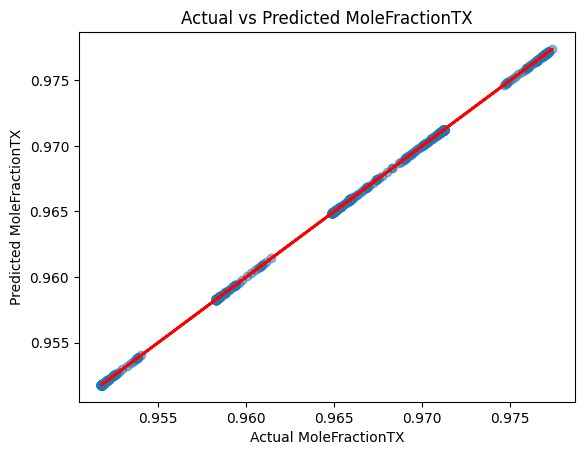

Mean Absolute Error: 3.4606268532467245e-06
Root Mean Squared Error: 4.718420264652591e-06
R-squared: 0.9999996953574097
Polynomial equation:
y = 57.68 + 0.00PC1 + 0.00PC2 + 0.00PC1^2 + -0.00PC1PC2 + -0.00PC2^2 + 0.00PC1^3 + 0.00PC1^2PC2 + -0.00PC1PC2^2 + 0.00PC2^3


In [ ]:
# prompt: fit the best polynomial equation and plot the equation

# Fit a polynomial regression model
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
reg_poly = LinearRegression().fit(X_poly, y)

# Plot the actual vs predicted values
plt.figure()
plt.scatter(y, reg_poly.predict(X_poly), alpha=0.5)
plt.plot(y, y, color='red', linewidth=2)
plt.xlabel('Actual MoleFractionTX')
plt.ylabel('Predicted MoleFractionTX')
plt.title('Actual vs Predicted MoleFractionTX')
plt.show()

# Calculate the mean absolute error
mae = np.abs(reg_poly.predict(X_poly) - y).mean()
print('Mean Absolute Error:', mae)

# Calculate the root mean squared error
rmse = np.sqrt(np.mean((reg_poly.predict(X_poly) - y) ** 2))
print('Root Mean Squared Error:', rmse)

# Calculate the R-squared value
r2 = reg_poly.score(X_poly, y)
print('R-squared:', r2)

# Print the polynomial equation
print('Polynomial equation:')
print('y = {:.2f} + {:.2f}PC1 + {:.2f}PC2 + {:.2f}PC1^2 + {:.2f}PC1PC2 + {:.2f}PC2^2 + {:.2f}PC1^3 + {:.2f}PC1^2PC2 + {:.2f}PC1PC2^2 + {:.2f}PC2^3'.format(
    reg_poly.intercept_,
    *reg_poly.coef_[1:]
))

# Interpretation of the polynomial model:
# The polynomial regression model fits a curved surface to the data, allowing for a more complex relationship between the principal components and the predicted value of MoleFractionTX.
# The polynomial equation shows the coefficients for each term in the model, including the intercept, the linear terms, the quadratic terms, and the cubic terms.
# The coefficients can be interpreted in a similar way to the coefficients of the linear regression model, but they represent the change in the predicted value of MoleFractionTX for a one-unit change in the corresponding principal component, taking into account the other terms in the equation.
# The model performance metrics suggest that the polynomial model has a better fit to the data than the linear regression model.

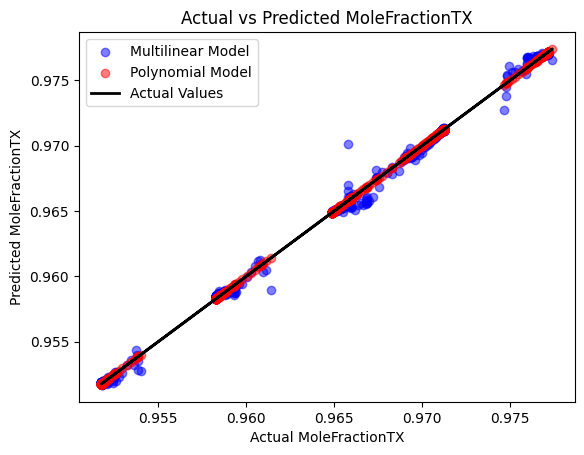

In [ ]:
# prompt: plot multilinear model & polynomial model MoleFractionTX on y axis  vs sensor data on x axis in same plot give both contrast colour

# Plot the actual vs predicted values for both models
plt.figure()
plt.scatter(df['MoleFractionTX'], results.predict(), color='blue', alpha=0.5, label='Multilinear Model')
plt.scatter(df['MoleFractionTX'], reg_poly.predict(X_poly), color='red', alpha=0.5, label='Polynomial Model')
plt.plot(df['MoleFractionTX'], df['MoleFractionTX'], color='black', linewidth=2, label='Actual Values')
plt.xlabel('Actual MoleFractionTX')
plt.ylabel('Predicted MoleFractionTX')
plt.title('Actual vs Predicted MoleFractionTX')
plt.legend()
plt.show()


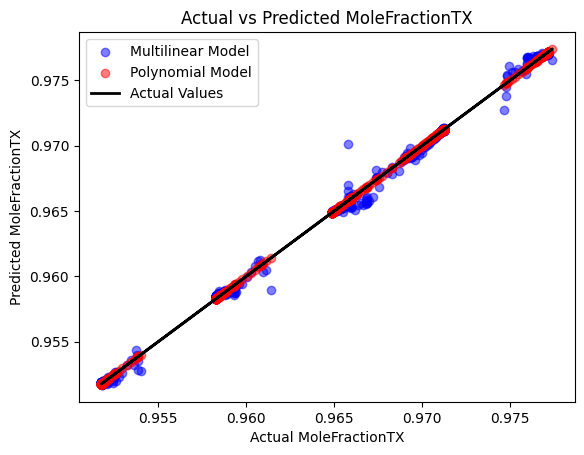

In [ ]:
# prompt: plot multilinear model & polynomial model MoleFractionTX & plot predicited  from pca in same plot give both contrast colour

# Plot the actual vs predicted values for both models
plt.figure()
plt.scatter(df['MoleFractionTX'], results.predict(), color='blue', alpha=0.5, label='Multilinear Model')
plt.scatter(df['MoleFractionTX'], reg_poly.predict(X_poly), color='red', alpha=0.5, label='Polynomial Model')
plt.plot(df['MoleFractionTX'], df['MoleFractionTX'], color='black', linewidth=2, label='Actual Values')
plt.xlabel('Actual MoleFractionTX')
plt.ylabel('Predicted MoleFractionTX')
plt.title('Actual vs Predicted MoleFractionTX')
plt.legend()
plt.show()
